In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import nltk
import random
import seaborn as sns
import re
from nltk.classify import NaiveBayesClassifier
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

# Importing the Dataset

In [81]:
df = pd.read_csv('mbti_1.csv')
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


# Checking if there are missing values in dataset

In [82]:
df.isnull().sum()

type     0
posts    0
dtype: int64

In [83]:
#Size of dataset
df.shape

(8675, 2)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [85]:
df.type.value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

C:\Users\DIV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


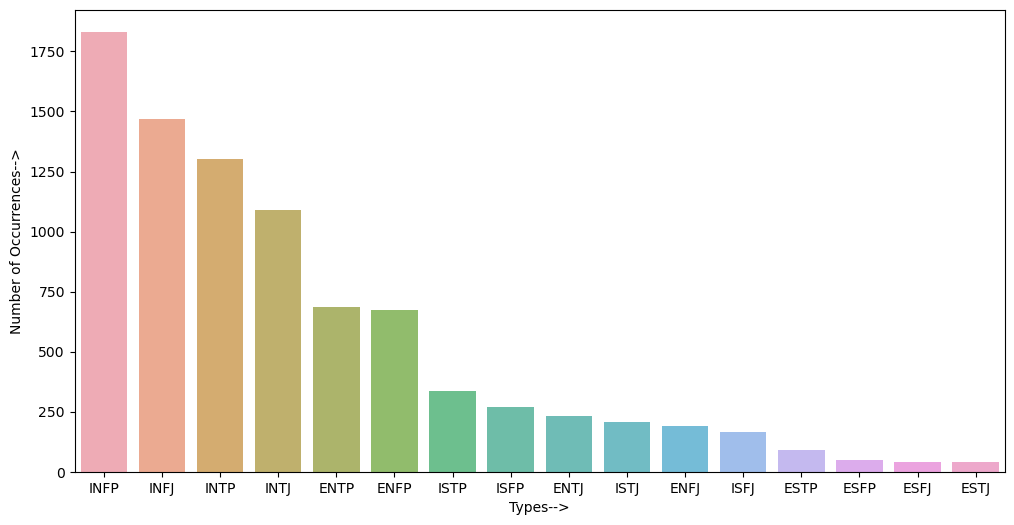

In [86]:
#Data is a bit imbalanced
#Number of occurences v/s Types
count_series = df['type'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(count_series.index, count_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences-->')
plt.xlabel('Types-->')
plt.show()

In [87]:
#The posts in the post field
df['posts'].head()

0    'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1    'I'm finding the lack of me in these posts ver...
2    'Good one  _____   https://www.youtube.com/wat...
3    'Dear INTP,   I enjoyed our conversation the o...
4    'You're fired.|||That's another silly misconce...
Name: posts, dtype: object

In [159]:
df.iloc[0,1].split("|||")
list = []

In [89]:
#Finding the 16 unique types of personalities from 'types' column
types = np.unique(np.array(df['type']))
types

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [90]:
#The number of posts
len(df.iloc[1,1].split('|||'))

50

In [91]:
#Total number of posts of each type
total = df.groupby(['type']).count()*50
total

,posts
type,
ENFJ,9500
ENFP,33750
ENTJ,11550
ENTP,34250
ESFJ,2100
ESFP,2400
ESTJ,1950
ESTP,4450
INFJ,73500


Text(0.5, 1.0, 'Total posts for each personality type')

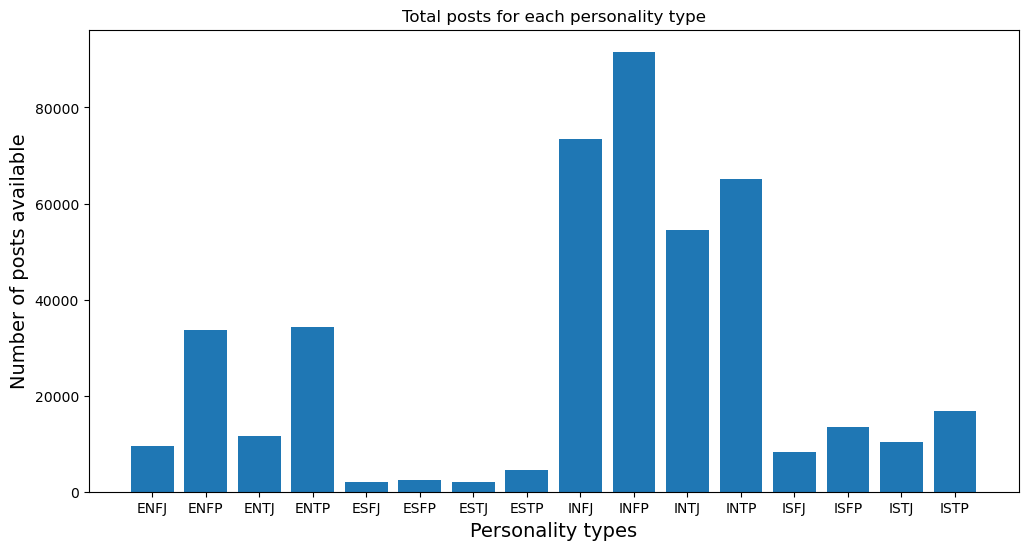

In [92]:
#Graphing "Total number of posts of each type" for better visualization


plt.figure(figsize=(12,6))
plt.bar(np.array(total.index), height = total['posts'])
plt.xlabel('Personality types', size = 14)
plt.ylabel('Number of posts available', size = 14)
plt.title('Total posts for each personality type')

# Organizing the Data to Create a Bag of Words Model

In [93]:
#We segregate all the posts according to their personality types and create a new dataframe to store that

all_the_posts = pd.DataFrame() 
for i in types:
    temp1 = df[df['type'] == i]['posts']
    temp2 = []
    for j in temp1:
        temp2 += j.split('|||')
        temp3 = pd.Series(temp2)
        all_the_posts[i] = temp3



In [94]:
all_the_posts.head()

,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,'https://www.youtube.com/watch?v=PLAaiKvHvZs,"'He doesn't want to go on the trip without me,...",'You're fired.,'I'm finding the lack of me in these posts ver...,'Why not?,'Edit: I forgot what board this was on.,this is such a catch 22,Splinter Cell Blacklist for Xbox 360.,'http://www.youtube.com/watch?v=qsXHcwe3krw,'I think we do agree. I personally don't consi...,"'Dear INTP, I enjoyed our conversation the o...",'Good one _____ https://www.youtube.com/wat...,'I love feeling affectionate for the one I lov...,'They paint without numbers,'Newton's Universal Gravity Law. I mean seriou...,'I got 593. From what I've read about the Enn...
1,51 :o,I'm still completely in AWE and I'm AMAZED tha...,That's another silly misconception. That appro...,Sex can be boring if it's in the same position...,Any other ESFJs originally mistype as an NFP? ...,I am currently reading 'Artemis Fowl: The Eter...,"I'm here! Although, I'm quite the terrible EST...",ESTPs are generally well liked. If you get hat...,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,Literature... I'd suggest 'Everyday Zen' by Ch...,"Dear ENTJ sub, Long time no see. Sincerely,...","Of course, to which I say I know; that's my bl...",Kind of an update on my past post above. Whate...,I'd guess at istp too,"Well, if money and time was no object, I would...",GTFO FEELER!
2,I went through a break up some months ago. We ...,"Thanks, everyone. I'm struggling with being se...",But guys... he REALLY wants to go on a super-d...,Giving new meaning to 'Game' theory.,Hello again. Thanks for all your help. I know ...,"Hi all, if you've got some spare time and why ...",Yikes. I do not want power...,I often come off to people with the opposite o...,enfp and intj moments https://www.youtube.com...,Being emotional doesn't automatically make som...,None of them. All other types hurt in deep exi...,Does being absolutely positive that you and yo...,It feels weird being in love for the first tim...,"My best bud is ESFP, very funny, entertaining ...",http://www.oglaf.com/media/comic/failsafe.jpg,A lot of the stuff that you read in the INTP d...
3,ENFJ Puns so many puns.,My husband works an extra job each year to pay...,Never mind. Just go on permanent vacation.,Hello *ENTP Grin* That's all it takes. Than w...,"Of the J functions, I'd say it would be: Fi>Ti...",BABYMETAL are the best band of this decade ht...,Thank you SO SO much. This is what I had plann...,Ask her what you are to her.,What has been the most life-changing experienc...,"I'm a Ch'an Buddhist, so it's a daily thing fo...",Probably a sliding scale that depends on indiv...,"No, I didn't; thank you for a link!",Unsure if i completely understand the question...,"I used to smoke weed alot, everyday from morni...",I'm still laughing! xD http://www.youtube.com...,Don't worry about it. You are trying to make ...
4,Well I personally don't go that much for attra...,He said that it's not like he's asking me to d...,Two months? I wouldn't be crazy about the idea...,This + Lack of Balance and Hand Eye Coordination.,The ESFJs on this site are lovely. I'm general...,Banned for being a fire hazard.,Hi,I'm a euphonium player and a writer,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,"Glad to know I'm not the only one. I meditate,...",Draco Malfoy also. I'd say he's either 358 or ...,So-called Ti-Si loop (and it can stem from any...,"Not often, but I tend to lose it more when it ...",Jimi Hendrix - The Wind Cries Mary. After all...,"workaround is working for me, and I'm using FF...",My mother-in-law is an ESTJ. She is the epito...


# Creating a Function to Tokenize the Words

In [95]:
unused_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)
def build_bag_of_words_feats_fil(words):
    words = nltk.word_tokenize(words)
    return {
        word : 1 for word in words \
        if not word in unused_words
    }


In [96]:
#Testing build_bag_of_words_feat() function
build_bag_of_words_feats_fil(all_the_posts['ISFJ'].iloc[1])

{'Kind': 1,
 'update': 1,
 'past': 1,
 'post': 1,
 'Whatever': 1,
 "'d": 1,
 'call': 1,
 'friendship': 1,
 'also': 1,
 'close': 1,
 'affectionate': 1,
 'someone': 1,
 'I': 1,
 "'m": 1,
 'We': 1,
 "'re": 1,
 'boyfriend/': 1,
 'girlfriend': 1,
 'since': 1,
 '...': 1}

In [97]:
#Creating an array of features
features = []
for j in types:
    temp1 = all_the_posts[j]
    temp1 = temp1.dropna() 
    features += [[(build_bag_of_words_feats_fil(i), j) \
    for i in temp1]]

In [98]:
temp1.dropna().head()

0    'I got 593.  From what I've read about the Enn...
1                                         GTFO FEELER!
2    A lot of the stuff that you read in the INTP d...
3    Don't worry about it.  You are trying to make ...
4    My mother-in-law is an ESTJ.  She is the epito...
Name: ISTP, dtype: object

In [99]:
from nltk.corpus import stopwords
from string import punctuation

In [100]:
from nltk.stem import WordNetLemmatizer
Stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [101]:
personality_types = [x.lower() for x in types]
stop_words = ['hmm', 'ahh']
personality_types

['enfj',
 'enfp',
 'entj',
 'entp',
 'esfj',
 'esfp',
 'estj',
 'estp',
 'infj',
 'infp',
 'intj',
 'intp',
 'isfj',
 'isfp',
 'istj',
 'istp']

In [102]:
#Tokenizer
from nltk.tokenize import word_tokenize
def tokenizer(text):
    st_wr = set(Stop)
    regex1 = re.compile("[^a-zA-Z ]")
    regex2 = re.compile("[…\+,'’]")
    post = re.sub(r'''https?:\/\/[^| ]+''', '', text, flags=re.MULTILINE)
    post = re.sub(r'''[0-9]+''', '', post, flags=re.MULTILINE) 
    #Removal of links
    post=post.replace('|||'," ") 
    # Remove puntuations 
    puncs1=['@','#','$','%','^','~','&','*','(',')','-','_','+','=','{','}','[',']','|',
            '\\','"',"'",';',':','<','>','/', ',','.','?','!','\n']
    for punc in puncs1:
        post=post.replace(punc,' ') 
    # Remove extra white spaces
    text=re.sub( '\s+', ' ', post ).strip()
    text = regex2.sub('', text)
    words = word_tokenize(text)
    words = [x.lower() for x in words]
    words = [x for x in words if x not in punctuation]
    words = [x for x in words if x not in personality_types]
    words = [x for x in words if x not in stop_words]
    
    return [lemmatizer.lemmatize(word) for word in words if word not in st_wr]

In [103]:
df["tokens"] = df["posts"].apply(tokenizer)
df.head()

,type,posts,tokens
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,"[moment, sportscenter, top, ten, play, prank, ..."
1,ENTP,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,"[good, one, course, say, know, blessing, curse..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"[fired, another, silly, misconception, approac..."


In [104]:
#Creating a new data frame without the column of posts
dfr_tokens = df.drop(columns = "posts")
dfr_tokens.head()

,type,tokens
0,INFJ,"[moment, sportscenter, top, ten, play, prank, ..."
1,ENTP,"[finding, lack, post, alarming, sex, boring, p..."
2,INTP,"[good, one, course, say, know, blessing, curse..."
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,"[fired, another, silly, misconception, approac..."


In [105]:
#Conevrting the tokens to token text
dfr_text = dfr_tokens['tokens'].apply(lambda x: ' '.join(x))
dfr_text.head()

0    moment sportscenter top ten play prank life ch...
1    finding lack post alarming sex boring position...
2    good one course say know blessing curse absolu...
3    dear enjoyed conversation day esoteric gabbing...
4    fired another silly misconception approaching ...
Name: tokens, dtype: object

# Sentiment Analysis

In [128]:
analyzer = SentimentIntensityAnalyzer()

In [107]:
df2 = dfr_tokens.copy()
df2['text'] = dfr_tokens['tokens'].apply(lambda x:" ".join(x))
df2.head()

,type,tokens,text
0,INFJ,"[moment, sportscenter, top, ten, play, prank, ...",moment sportscenter top ten play prank life ch...
1,ENTP,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...
2,INTP,"[good, one, course, say, know, blessing, curse...",good one course say know blessing curse absolu...
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g...",dear enjoyed conversation day esoteric gabbing...
4,ENTJ,"[fired, another, silly, misconception, approac...",fired another silly misconception approaching ...


In [108]:
r1 = df2.iloc[[1,2]]
r1

,type,tokens,text
1,ENTP,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...
2,INTP,"[good, one, course, say, know, blessing, curse...",good one course say know blessing curse absolu...


In [109]:
#Initializing the sentiment count
df2["Compound"] = 0.0
df2["Negative"] = 0.0
df2["Neutral"]=0.0
df2["Positive"]=0.0
df2.head()

,type,tokens,text,Compound,Negative,Neutral,Positive
0,INFJ,"[moment, sportscenter, top, ten, play, prank, ...",moment sportscenter top ten play prank life ch...,0.0,0.0,0.0,0.0
1,ENTP,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...,0.0,0.0,0.0,0.0
2,INTP,"[good, one, course, say, know, blessing, curse...",good one course say know blessing curse absolu...,0.0,0.0,0.0,0.0
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g...",dear enjoyed conversation day esoteric gabbing...,0.0,0.0,0.0,0.0
4,ENTJ,"[fired, another, silly, misconception, approac...",fired another silly misconception approaching ...,0.0,0.0,0.0,0.0


In [110]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
for i, x in df2.iterrows():
   
    text = dfr_text      
    sentiment = analyzer.polarity_scores(x["text"])
    df2.iloc[i, 3]  = sentiment['compound']
    df2.iloc[i, 6]       = sentiment['pos']
    df2.iloc[i, 4]       = sentiment['neg']
    df2.iloc[i, 5]       = sentiment['neu']

df2.head()


,type,tokens,text,Compound,Negative,Neutral,Positive
0,INFJ,"[moment, sportscenter, top, ten, play, prank, ...",moment sportscenter top ten play prank life ch...,0.9924,0.132,0.597,0.271
1,ENTP,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...,0.9987,0.119,0.598,0.284
2,INTP,"[good, one, course, say, know, blessing, curse...",good one course say know blessing curse absolu...,0.9985,0.116,0.581,0.303
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g...",dear enjoyed conversation day esoteric gabbing...,0.9985,0.087,0.661,0.252
4,ENTJ,"[fired, another, silly, misconception, approac...",fired another silly misconception approaching ...,0.9930,0.186,0.538,0.276


In [111]:
dfr_text


0       moment sportscenter top ten play prank life ch...
1       finding lack post alarming sex boring position...
2       good one course say know blessing curse absolu...
3       dear enjoyed conversation day esoteric gabbing...
4       fired another silly misconception approaching ...
                              ...                        
8670    ixfp always think cat fi doms reason especiall...
8671    thread already exists someplace else heck dele...
8672    many question thing would take purple pill pic...
8673    conflicted right come wanting child honestly m...
8674    long since personalitycafe although seem chang...
Name: tokens, Length: 8675, dtype: object

array([[<AxesSubplot:title={'center':'Compound'}>,
        <AxesSubplot:title={'center':'Negative'}>],
       [<AxesSubplot:title={'center':'Neutral'}>,
        <AxesSubplot:title={'center':'Positive'}>]], dtype=object)

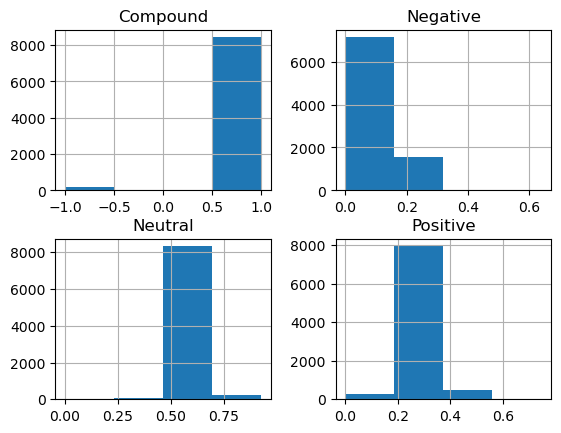

In [112]:
df2[['Compound','Negative','Neutral','Positive']].hist(bins = 4)

In [161]:
"""
We find that there is a class imbalance, so we convert the 16 existing  classess into 8 classes, namely-->
    Extrovert <-> Introvert
    Sensing   <-> Intuitive
    Thinking  <-> Feeling
    Judging   <-> Perceiving
"""
df2["Extrovert"] = df2["type"].apply(
    lambda x: True if x[0] == "E" else 0
)
df2["Sensing"] = df2["type"].apply(
    lambda x: True if x[1] == "S" else 0
)
df2["Thinking"] = df2["type"].apply(
    lambda x: True if x[2] == "T" else 0
)
df2["Judging"] = df2["type"].apply(
    lambda x: True if x[3] == "J" else 0
)
df2["Introvert"] = df2["type"].apply(
    lambda x: True if x[0] == "I" else 0
)
df2["Intuitive"] = df2["type"].apply(
    lambda x: True if x[1] == "N" else 0
)
df2["Feeling"] = df2["type"].apply(
    lambda x: True if x[2] == "F" else 0
)
df2["Perceiving"] = df2["type"].apply(
    lambda x: True if x[3] == "P" else 0
)

# rearranging the dataframe columns
df_combined = df2[
    ["type", "Extrovert", "Sensing", "Thinking", "Judging","Introvert", "Intuitive", "Feeling", "Perceiving", "Compound", "Negative", "Neutral", "Positive",'text']
]
df_combined.head()

,type,Extrovert,Sensing,Thinking,Judging,Introvert,Intuitive,Feeling,Perceiving,Compound,Negative,Neutral,Positive,text
0,INFJ,0,0,0,True,True,True,True,0,0.9924,0.132,0.597,0.271,moment sportscenter top ten play prank life ch...
1,ENTP,True,0,True,0,0,True,0,True,0.9987,0.119,0.598,0.284,finding lack post alarming sex boring position...
2,INTP,0,0,True,0,True,True,0,True,0.9985,0.116,0.581,0.303,good one course say know blessing curse absolu...
3,INTJ,0,0,True,True,True,True,0,0,0.9985,0.087,0.661,0.252,dear enjoyed conversation day esoteric gabbing...
4,ENTJ,True,0,True,True,0,True,0,0,0.9930,0.186,0.538,0.276,fired another silly misconception approaching ...


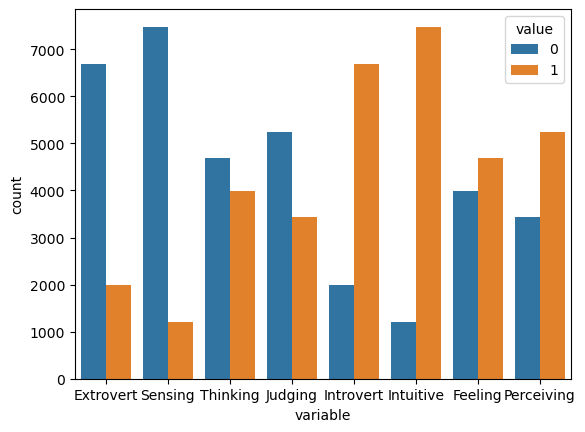

In [149]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        df_combined[["Extrovert", "Sensing", "Thinking", "Judging","Introvert", "Intuitive", "Feeling", "Perceiving"]]
    )
)

plt.show()

In [150]:
#Counting Occurance of Words per Comment
def v_row(row):
    li = []
    for i in row.split('|||'):
        li.append(len(i.split()))
    return np.var(l)
df2['words per comment'] = df['posts'].apply(lambda x: len(x.split())/50.0)
df2.head()

,type,tokens,text,Compound,Negative,Neutral,Positive,Extrovert,Sensing,Thinking,Judging,Introvert,Intuitive,Feeling,Perceiving,words_per_comment,words per comment
0,INFJ,"[moment, sportscenter, top, ten, play, prank, ...",moment sportscenter top ten play prank life ch...,0.9924,0.132,0.597,0.271,0,0,0,1,True,True,True,0,11.12,11.12
1,ENTP,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...,0.9987,0.119,0.598,0.284,1,0,1,0,0,True,0,True,23.40,23.40
2,INTP,"[good, one, course, say, know, blessing, curse...",good one course say know blessing curse absolu...,0.9985,0.116,0.581,0.303,0,0,1,0,True,True,0,True,16.72,16.72
3,INTJ,"[dear, enjoyed, conversation, day, esoteric, g...",dear enjoyed conversation day esoteric gabbing...,0.9985,0.087,0.661,0.252,0,0,1,1,True,True,0,0,21.28,21.28
4,ENTJ,"[fired, another, silly, misconception, approac...",fired another silly misconception approaching ...,0.9930,0.186,0.538,0.276,1,0,1,1,0,True,0,0,19.34,19.34


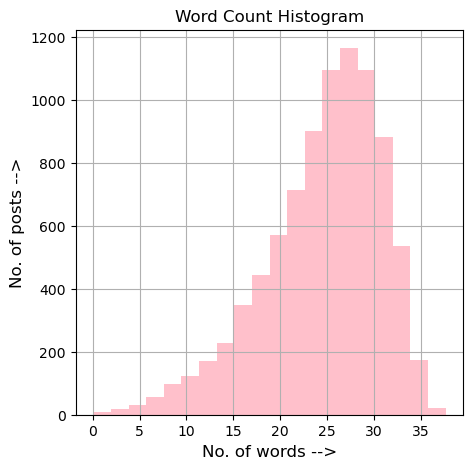

In [155]:
#Histogram for the Word Count
plt.figure(figsize=(5,5))
plt.title("Word Count Histogram", fontsize=12)
plt.xlabel("No. of words -->", fontsize=12)
plt.ylabel("No. of posts -->", fontsize=12)
df2["words per comment"].hist(bins=20, color='pink')
plt.show()

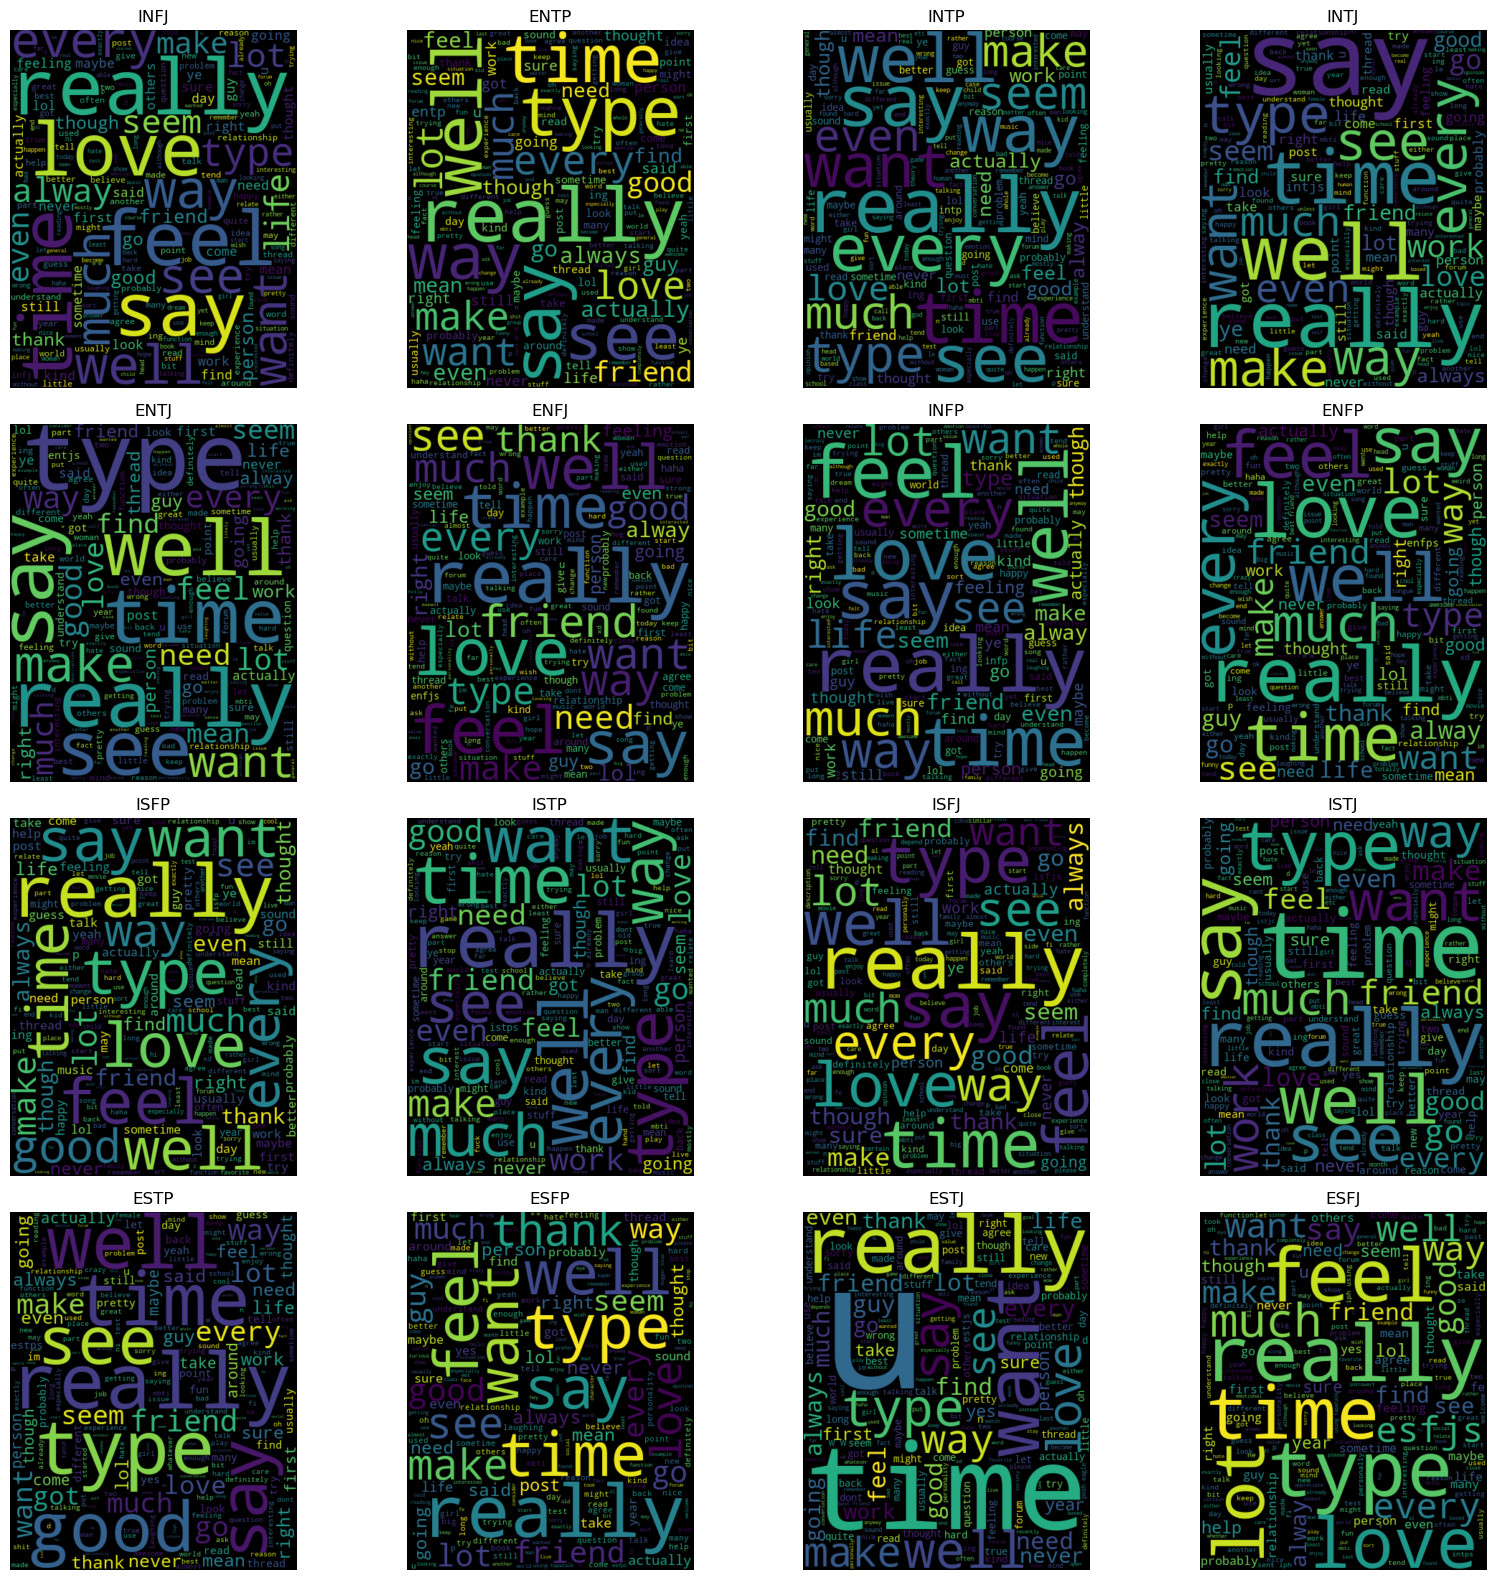

In [158]:
#Creating word clouds for each of the 16 personality types.

fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (20, 20))
fig.subplots_adjust(hspace = 0.1, wspace = 0.1)
ax = ax.ravel()
for i, mbti_type in enumerate(df2["type"].unique()):
    wordcloud_words = " ".join(
        [
            re.sub(r"(know)|(thing)|(one)|(people)|(think)", "", user_posts)
            for user_posts in df2[df2["type"] == mbti_type][
                "text"
            ]
        ]
    )

    wordcloud = WordCloud(height=500).generate(wordcloud_words)
    ax[i].imshow(wordcloud, interpolation="bilinear")
    ax[i].axis("off")
    ax[i].set_title(mbti_type)


<AxesSubplot:xlabel='Compound', ylabel='type'>

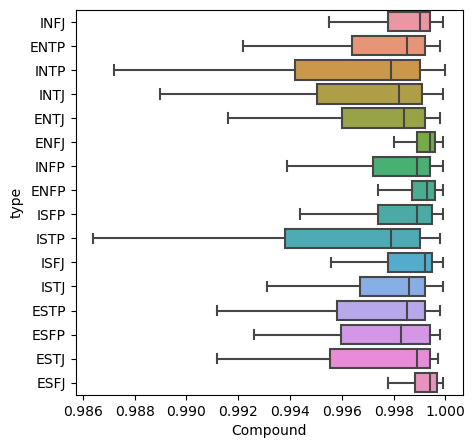

In [137]:
#Compound Sentiment Score by Type
plt.figure(figsize=(5, 5))
sns.boxplot(y="type", x="Compound", data=df2, showfliers=False)


<AxesSubplot:xlabel='Positive', ylabel='type'>

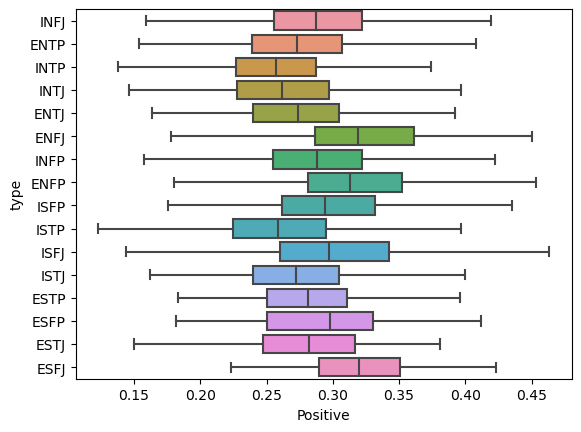

In [138]:
#Positive Sentiment Score by Type 
sns.boxplot(y="type", x="Positive", data=df2, showfliers=False)

<AxesSubplot:xlabel='Negative', ylabel='type'>

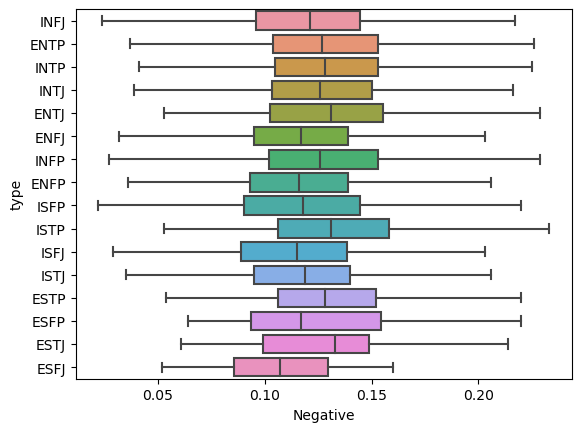

In [139]:
#Negative Sentiment Score by Type
sns.boxplot(y="type", x="Negative", data=df2, showfliers=False)

<AxesSubplot:xlabel='Neutral', ylabel='type'>

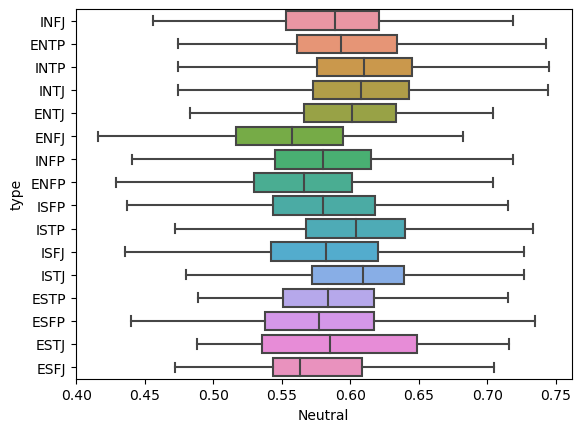

In [140]:
#Neutral Sentiment Score by Type
sns.boxplot(y="type", x="Neutral", data=df2, showfliers=False)